Arlex Fabian Galindez Rivera  Cod: 104616010700

In [1]:
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import itertools

In [3]:
# Definición de las variables lingüísticas
calidad_requerimientos = ctrl.Antecedent(np.arange(0, 11,1), 'calidad_requerimientos') #Define que tan bien estan definidos los requisitos
experiencia_equipo = ctrl.Antecedent(np.arange(0, 11,1), 'experiencia_equipo') #Define la experiencia del equipo en años
tamaño_proyecto = ctrl.Antecedent(np.arange(0,21,1), 'tamaño_proyecto') # Define el numero de modulos en un proyecto a desarrollar
complejidad_tecnica = ctrl.Antecedent(np.arange(0, 101,10), 'complejidad_tecnica') #Define la complejidad del proyecto en base a integracion de sistemas
recursos_disponibles = ctrl.Antecedent(np.arange(0,11,1), 'recursos_disponibles') #Define los recursos con los que se cuenta como desarrolladores, equipos, tecnologias

severidad = ctrl.Consequent(np.arange(0, 101, 10), 'severidad')

In [4]:
# Definición de las funciones de membresía
calidad_requerimientos['baja'] = fuzz.zmf(calidad_requerimientos.universe, 4, 7)
calidad_requerimientos['media'] = fuzz.trimf(calidad_requerimientos.universe, [5, 6, 8])
calidad_requerimientos['alta'] = fuzz.trimf(calidad_requerimientos.universe, [7, 10, 10])

In [5]:
experiencia_equipo['baja'] = fuzz.zmf(experiencia_equipo.universe, 5, 7)
experiencia_equipo['experimentado'] = fuzz.trimf(experiencia_equipo.universe, [6, 8, 10])

In [6]:
tamaño_proyecto['pequeño'] = fuzz.zmf(tamaño_proyecto.universe, 5,7)
tamaño_proyecto['grande'] = fuzz.trimf(tamaño_proyecto.universe, [6,15,20])

In [7]:
complejidad_tecnica['baja'] = fuzz.zmf(complejidad_tecnica.universe, 30,70)
complejidad_tecnica['alta'] = fuzz.trimf(complejidad_tecnica.universe, [60, 80, 100])

In [28]:
recursos_disponibles['moderado'] = fuzz.zmf(recursos_disponibles.universe, 5,7)
recursos_disponibles['optimo'] = fuzz.trimf(recursos_disponibles.universe, [6,8,10])

In [29]:
severidad['baja'] = fuzz.zmf(severidad.universe,  20, 40)
severidad['media'] = fuzz.trimf(severidad.universe, [0, 40, 70])
severidad['alta'] = fuzz.trimf(severidad.universe, [50, 70, 100])

Definir el consecuente
Definir perceptible

In [30]:
# Definir los términos para cada variable
calidad_terms = ['baja', 'media', 'alta']
experiencia_terms = ['baja', 'experimentado']
tamaño_terms = ['pequeño', 'grande']
complejidad_terms = ['baja', 'alta']
recursos_terms = ['moderado', 'optimo']

# Generar todas las combinaciones posibles de términos
combinations = list(itertools.product(calidad_terms, experiencia_terms, tamaño_terms, complejidad_terms, recursos_terms))

# Lista para almacenar las reglas generadas
reglas = []

# Definir las consecuencias correspondientes a cada combinación de términos
consecuencias = {
    ('baja', 'baja', 'pequeño', 'baja', 'moderado'): 'baja',
    ('baja', 'baja', 'pequeño', 'baja', 'optimo'): 'media',
    ('baja', 'baja', 'pequeño', 'alta', 'moderado'): 'alta',
    ('baja', 'baja', 'pequeño', 'alta', 'optimo'): 'alta',
    ('baja', 'baja', 'grande', 'baja', 'moderado'): 'baja',
    ('baja', 'baja', 'grande', 'baja', 'optimo'): 'media',
    ('baja', 'baja', 'grande', 'alta', 'moderado'): 'alta',
    ('baja', 'baja', 'grande', 'alta', 'optimo'): 'alta',
    ('baja', 'experimentado', 'pequeño', 'baja', 'moderado'): 'media',
    ('baja', 'experimentado', 'pequeño', 'baja', 'optimo'): 'alta',
    ('baja', 'experimentado', 'pequeño', 'alta', 'moderado'): 'alta',
    ('baja', 'experimentado', 'pequeño', 'alta', 'optimo'): 'alta',
    ('baja', 'experimentado', 'grande', 'baja', 'moderado'): 'media',
    ('baja', 'experimentado', 'grande', 'baja', 'optimo'): 'alta',
    ('baja', 'experimentado', 'grande', 'alta', 'moderado'): 'alta',
    ('baja', 'experimentado', 'grande', 'alta', 'optimo'): 'alta',
    ('media', 'baja', 'pequeño', 'baja', 'moderado'): 'baja',
    ('media', 'baja', 'pequeño', 'baja', 'optimo'): 'media',
    ('media', 'baja', 'pequeño', 'alta', 'moderado'): 'alta',
    ('media', 'baja', 'pequeño', 'alta', 'optimo'): 'alta',
    ('media', 'baja', 'grande', 'baja', 'moderado'): 'baja',
    ('media', 'baja', 'grande', 'baja', 'optimo'): 'media',
    ('media', 'baja', 'grande', 'alta', 'moderado'): 'alta',
    ('media', 'baja', 'grande', 'alta', 'optimo'): 'alta',
    ('media', 'experimentado', 'pequeño', 'baja', 'moderado'): 'media',
    ('media', 'experimentado', 'pequeño', 'baja', 'optimo'): 'alta',
    ('media', 'experimentado', 'pequeño', 'alta', 'moderado'): 'alta',
    ('media', 'experimentado', 'pequeño', 'alta', 'optimo'): 'alta',
    ('media', 'experimentado', 'grande', 'baja', 'moderado'): 'media',
    ('media', 'experimentado', 'grande', 'baja', 'optimo'): 'alta',
    ('media', 'experimentado', 'grande', 'alta', 'moderado'): 'alta',
    ('media', 'experimentado', 'grande', 'alta', 'optimo'): 'alta',
    ('alta', 'baja', 'pequeño', 'baja', 'moderado'): 'media',
    ('alta', 'baja', 'pequeño', 'baja', 'optimo'): 'media',
    ('alta', 'baja', 'pequeño', 'alta', 'moderado'): 'alta',
    ('alta', 'baja', 'pequeño', 'alta', 'optimo'): 'alta',
    ('alta', 'baja', 'grande', 'baja', 'moderado'): 'media',
    ('alta', 'baja', 'grande', 'baja', 'optimo'): 'media',
    ('alta', 'baja', 'grande', 'alta', 'moderado'): 'alta',
    ('alta', 'baja', 'grande', 'alta', 'optimo'): 'alta',
    ('alta', 'experimentado', 'pequeño', 'baja', 'moderado'): 'media',
    ('alta', 'experimentado', 'pequeño', 'baja', 'optimo'): 'alta',
    ('alta', 'experimentado', 'pequeño', 'alta', 'moderado'): 'alta',
    ('alta', 'experimentado', 'pequeño', 'alta', 'optimo'): 'alta',
    ('alta', 'experimentado', 'grande', 'baja', 'moderado'): 'media',
    ('alta', 'experimentado', 'grande', 'baja', 'optimo'): 'alta',
    ('alta', 'experimentado', 'grande', 'alta', 'moderado'): 'alta',
    ('alta', 'experimentado', 'grande', 'alta', 'optimo'): 'alta',
}

# Crear una regla para cada combinación de términos
for combo in combinations:
    # Crear una regla con las condiciones correspondientes
    rule = ctrl.Rule(calidad_requerimientos[combo[0]] & experiencia_equipo[combo[1]] &
                     tamaño_proyecto[combo[2]] & complejidad_tecnica[combo[3]] & recursos_disponibles[combo[4]],
                     severidad[consecuencias[combo]])

    # Agregar la regla generada a la lista de reglas
    reglas.append(rule)

# Mostrar el número total de reglas generadas
print("Número total de reglas generadas:", len(reglas))

Número total de reglas generadas: 48


In [31]:
# Sistema de control difuso
riesgo_ctrl = ctrl.ControlSystem(reglas)
riesgo = ctrl.ControlSystemSimulation(riesgo_ctrl)
# Matriz para almacenar los resultados
resultados = np.zeros((11))


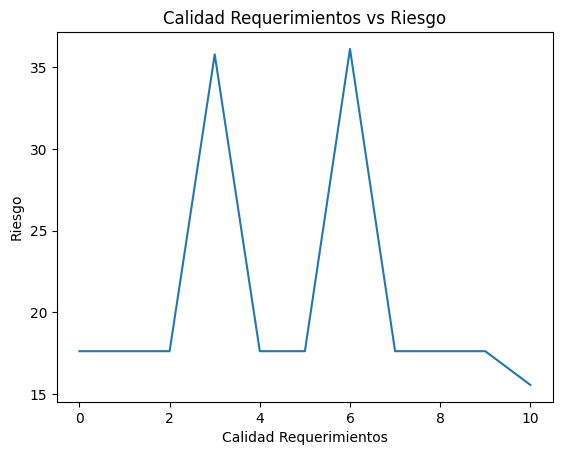

In [44]:
# Iterar para obtener los valores de riesgo
for i in range(10):
    # Asignar valores de entrada
    riesgo.input['calidad_requerimientos'] = np.random.randint(0, 11)
    riesgo.input['experiencia_equipo'] = 6.0
    riesgo.input['complejidad_tecnica'] = 50.0
    riesgo.input['recursos_disponibles'] = 6.0
    riesgo.input['tamaño_proyecto'] = 15.0

    # Evaluación del sistema de control difuso
    riesgo.compute()

    # Obtener el valor de riesgo
    valor_riesgo = riesgo.output['severidad']

    # Almacenar los resultados en la matriz
    resultados[i] = valor_riesgo

# Generar la gráfica
plt.plot(calidad_requerimientos.universe, resultados[:len(calidad_requerimientos.universe)])
plt.xlabel('Calidad Requerimientos')
plt.ylabel('Riesgo')
plt.title('Calidad Requerimientos vs Riesgo')
plt.show()


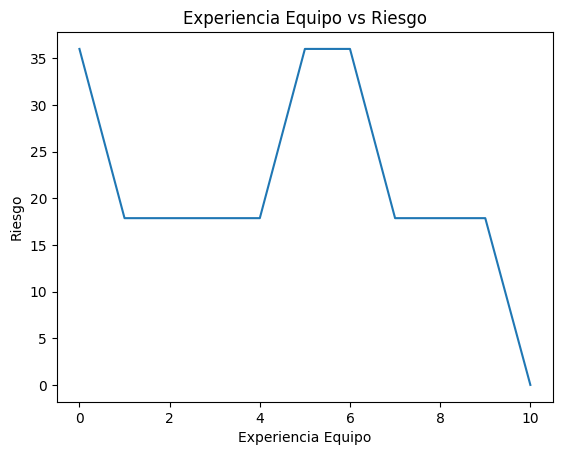

In [33]:
# Iterar para obtener los valores de riesgo
for i in range(10):
    # Asignar valores constantes para las otras variables
    riesgo.input['calidad_requerimientos'] = 6.0
    experiencia_equipo_valor = np.random.randint(0, 11)
    riesgo.input['experiencia_equipo'] = experiencia_equipo_valor
    riesgo.input['complejidad_tecnica'] = 50.0
    riesgo.input['recursos_disponibles'] = 4.0
    riesgo.input['tamaño_proyecto'] = 10.0

    # Evaluación del sistema de control difuso
    riesgo.compute()

    # Obtener el valor de riesgo
    valor_riesgo = riesgo.output['severidad']

    # Almacenar los resultados en la matriz
    resultados[i] = valor_riesgo

# Generar la gráfica
plt.plot(experiencia_equipo.universe, resultados[:len(experiencia_equipo.universe)])
plt.xlabel('Experiencia Equipo')
plt.ylabel('Riesgo')
plt.title('Experiencia Equipo vs Riesgo')
plt.show()

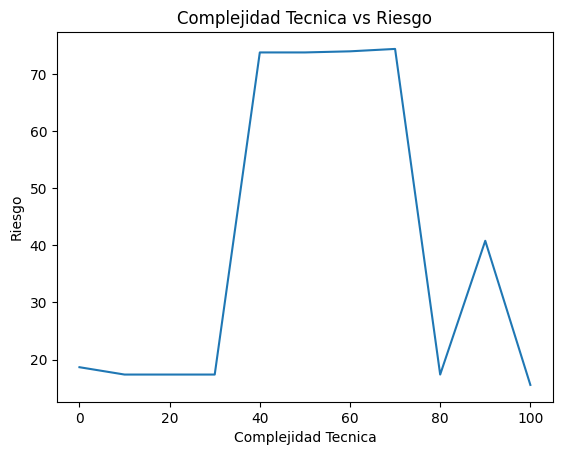

In [43]:
# Iterar para obtener los valores de riesgo
for i in range(10):
    # Asignar valores constantes para las otras variables
    riesgo.input['calidad_requerimientos'] = 3.0
    riesgo.input['experiencia_equipo'] = 4.0
    riesgo.input['complejidad_tecnica'] = np.random.randint(0,101)
    riesgo.input['recursos_disponibles'] = 4.0
    riesgo.input['tamaño_proyecto'] = 11.0

    # Evaluación del sistema de control difuso
    riesgo.compute()

    # Obtener el valor de riesgo
    valor_riesgo = riesgo.output['severidad']

    # Almacenar los resultados en la matriz
    resultados[i] = valor_riesgo

# Generar la gráfica
plt.plot(complejidad_tecnica.universe, resultados[:len(complejidad_tecnica.universe)])
plt.xlabel('Complejidad Tecnica')
plt.ylabel('Riesgo')
plt.title('Complejidad Tecnica vs Riesgo')
plt.show()

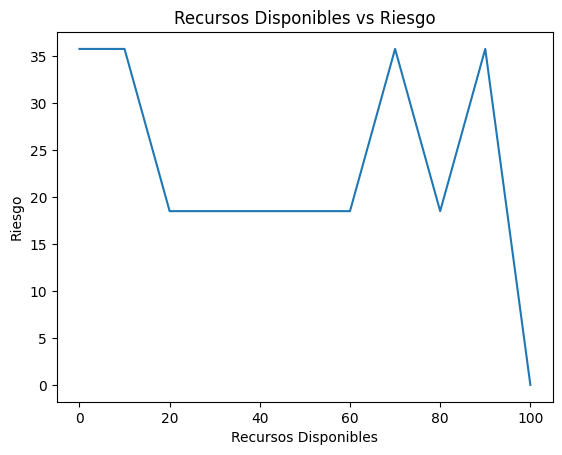

In [41]:
# Iterar para obtener los valores de riesgo
for i in range(10):
    # Asignar valores constantes para las otras variables
    riesgo.input['calidad_requerimientos'] = 3.0
    riesgo.input['experiencia_equipo'] = 4.0
    riesgo.input['complejidad_tecnica'] = 55.0
    riesgo.input['recursos_disponibles'] = np.random.randint(0,11)
    riesgo.input['tamaño_proyecto'] = 15.0

    # Evaluación del sistema de control difuso
    riesgo.compute()

    # Obtener el valor de riesgo
    valor_riesgo = riesgo.output['severidad']

    # Almacenar los resultados en la matriz
    resultados[i] = valor_riesgo

# Generar la gráfica
plt.plot(complejidad_tecnica.universe, resultados[:len(complejidad_tecnica.universe)])
plt.xlabel('Recursos Disponibles')
plt.ylabel('Riesgo')
plt.title('Recursos Disponibles vs Riesgo')
plt.show()

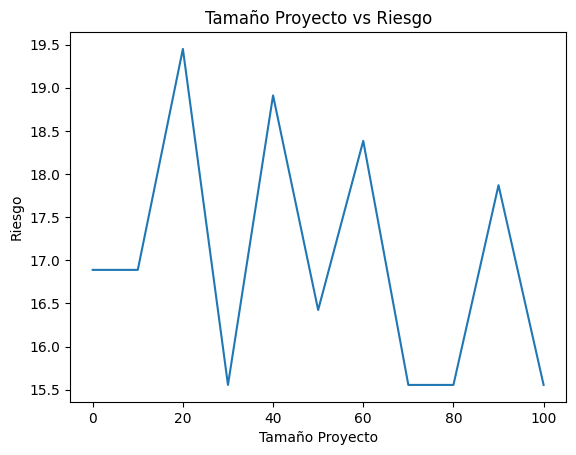

In [42]:
# Iterar para obtener los valores de riesgo
for i in range(11):
    # Asignar valores constantes para las otras variables
    riesgo.input['calidad_requerimientos'] = 3.0
    riesgo.input['experiencia_equipo'] = 4.0
    riesgo.input['complejidad_tecnica'] = 30.0
    riesgo.input['recursos_disponibles'] = 4.0
    riesgo.input['tamaño_proyecto'] = np.random.randint(0,21)

    # Evaluación del sistema de control difuso
    riesgo.compute()

    # Obtener el valor de riesgo
    valor_riesgo = riesgo.output['severidad']

    # Almacenar los resultados en la matriz
    resultados[i] = valor_riesgo

# Generar la gráfica
plt.plot(complejidad_tecnica.universe, resultados[:len(complejidad_tecnica.universe)])
plt.xlabel('Tamaño Proyecto')
plt.ylabel('Riesgo')
plt.title('Tamaño Proyecto vs Riesgo')
plt.show()